In [1]:
import os
os.chdir("..")
import torch
from epilearn.models.Temporal.SIR import SIR, SEIR, SIS
from epilearn.models.SpatialTemporal.NetworkSIR import NetSIR
import epilearn.utils.utils as utils
from epilearn.data.dataset import UniversalDataset
from epilearn import visualize

### Generate random static graph

In [2]:
# generate random static graph
initial_graph = utils.get_random_graph(num_nodes=100, connect_prob=0.15)
initial_states = torch.zeros(100,3) # [S,I,R]
initial_states[:, 0] = 1
# set infected individual: 3
initial_states[3, 0] = 0
initial_states[3, 1] = 1

### Initialize NetworkSIR model and perform simulation based on the generated inital graph

In [3]:
model = NetSIR(num_nodes=initial_graph.shape[0], horizon=120, infection_rate=0.01, recovery_rate=0.0384) # infection_rate, recover_rate, fixed_population
preds = model(initial_states, initial_graph, steps = None)

In [4]:
preds.argmax(2).shape

torch.Size([120, 100])

In [5]:
initial_graph.to_sparse().indices()

tensor([[ 0,  0,  0,  ..., 99, 99, 99],
        [ 9, 24, 31,  ..., 78, 83, 97]])

### Plot simulation result at a certain time point

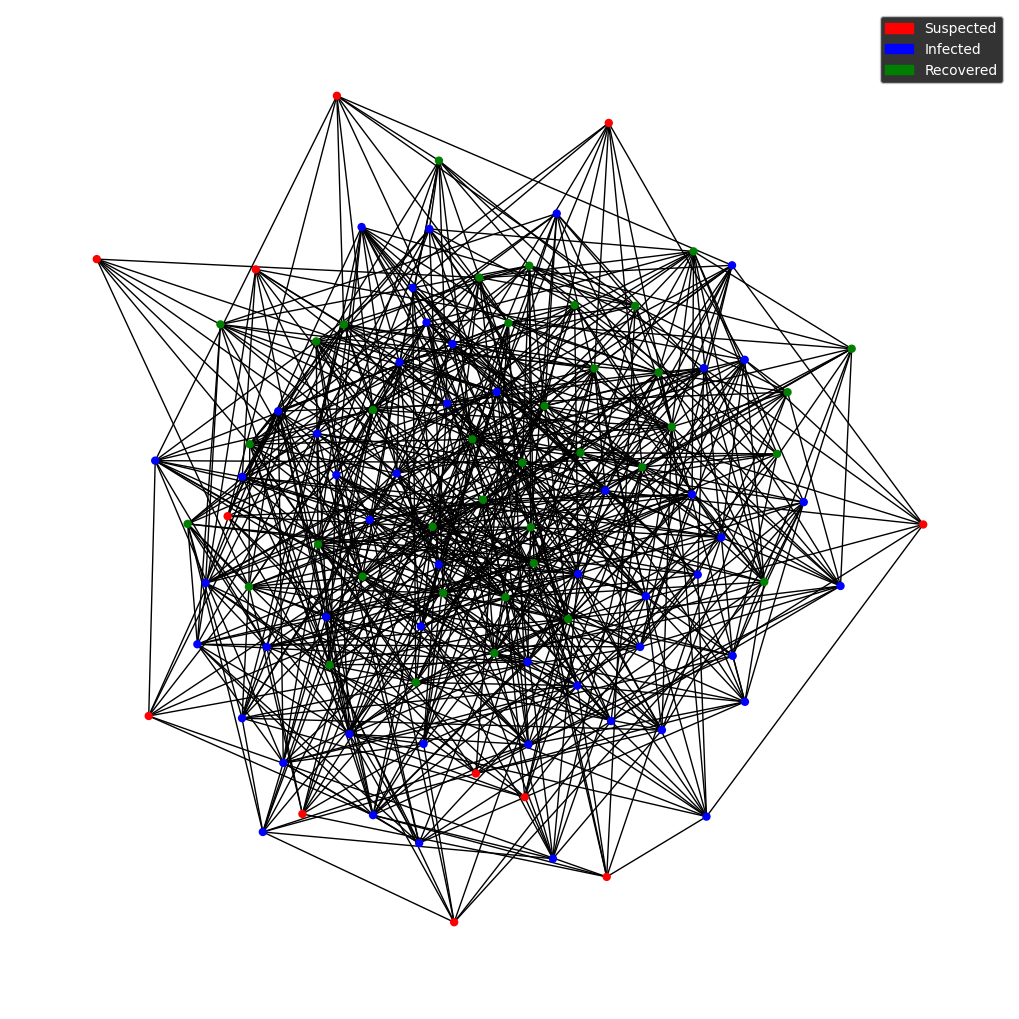

In [9]:
layout = visualize.plot_series(preds.argmax(2)[57].detach().numpy(), initial_graph.to_sparse().indices().detach().numpy(), classes=['Suspected', 'Infected', 'Recovered'])